In [151]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings

warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [152]:
# Code starts here
train_data= pd.read_csv(r"C:\Users\vaibh\Desktop\Python DS\Sprint 8_Tree Based ML Algorithm\Loan Defaulters\train.csv")
train_data

Id customer.id credit.policy             purpose int.rate  \
0     6269    LA006270           Yes  debt_consolidation   12.53%   
1     1460    LA001461           Yes         credit_card   10.20%   
2     5539    LA005540           Yes  debt_consolidation   12.87%   
3     9020    LA009021            No           all_other   15.37%   
4     4365    LA004366           Yes  debt_consolidation   14.61%   
...    ...         ...           ...                 ...      ...   
7657  9040    LA009041            No           all_other   14.74%   
7658  8527    LA008528            No  debt_consolidation   11.97%   
7659  4714    LA004715           Yes  debt_consolidation   16.00%   
7660  8419    LA008420            No  debt_consolidation   17.97%   
7661  2761    LA002762           Yes  debt_consolidation   14.11%   

      installment  log.annual.inc    dti  fico  days.with.cr.line  revol.bal  \
0          689.41       11.513725  14.45   722        4291.000000      13171   
1          485.42       10.315597  12.87   752        5789.958333      14857   
2          121.08       11.238436   1.58   692        3391.000000      12135   
3          348.47       11.142007  11.01   687        5370.000000      10631   
4          344.76       10.308953  11.36   672        2429.958333      10544   
...           ...             ...    ...   ...                ...        ...   
7657        34.54       11.034890   1.49   702        1080.000000       1914   
7658       166.00       10.308953  20.76   687        4079.958333      14536   
7659       457.05       11.418615  23.89   662        2190.000000      58686   
7660       225.86       10.645425  28.29   662        4188.000000      28432   
7661       329.46       10.714418  22.48   682        2309.958333      13575   

      revol.util  pub.rec inq.last.6mths delinq.2yrs paid.back.loan  
0           51.8        0    Less than 5          No            Yes  
1           31.3        0    Less than 5         Yes            Yes  
2           85.5        0    Less than 5          No            Yes  
3           35.3        0   Less than 10          No            Yes  
4           57.0        0    Less than 5         Yes            Yes  
...          ...      ...            ...         ...            ...  
7657        44.5        0    Less than 5          No             No  
7658        68.9        0    Less than 5          No            Yes  
7659        80.8        0    Less than 5          No            Yes  
7660        57.1        0    Less than 5         Yes             No  
7661        73.8        0    Less than 5          No             No  

[7662 rows x 16 columns]

In [153]:
print(train_data.nunique())
train_data.drop(['Id','customer.id'], axis=1, inplace=True)

Id                   7662
customer.id          7662
credit.policy           2
purpose                 7
int.rate              243
installment          4098
log.annual.inc       1694
dti                  2419
fico                   44
days.with.cr.line    2368
revol.bal            6463
revol.util           1027
pub.rec                 5
inq.last.6mths          4
delinq.2yrs             2
paid.back.loan          2
dtype: int64


In [154]:
train_data.corr()

installment  log.annual.inc       dti      fico  \
installment           1.000000        0.453808  0.051771  0.082383   
log.annual.inc        0.453808        1.000000 -0.050757  0.111597   
dti                   0.051771       -0.050757  1.000000 -0.244047   
fico                  0.082383        0.111597 -0.244047  1.000000   
days.with.cr.line     0.183815        0.334449  0.062301  0.266385   
revol.bal             0.245984        0.387064  0.196947 -0.016919   
revol.util            0.090740        0.058155  0.343668 -0.535856   
pub.rec              -0.034854        0.017186  0.007535 -0.148492   

                   days.with.cr.line  revol.bal  revol.util   pub.rec  
installment                 0.183815   0.245984    0.090740 -0.034854  
log.annual.inc              0.334449   0.387064    0.058155  0.017186  
dti                         0.062301   0.196947    0.343668  0.007535  
fico                        0.266385  -0.016919   -0.535856 -0.148492  
days.with.cr.line           1.000000   0.232899   -0.023765  0.063039  
revol.bal                   0.232899   1.000000    0.219287 -0.035446  
revol.util                 -0.023765   0.219287    1.000000  0.059871  
pub.rec                     0.063039  -0.035446    0.059871  1.000000

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

In [155]:
# To Separate Categorical and numerical columns
def num_and_cat_columns(df):
    numeric_var = [key for key in dict(df.dtypes)
                   if dict(df.dtypes)[key]
                       in ['float64','float32','int32','int64']] # Numeric Variable
    
    cat_var = [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] # Categorical Varible
    
    return numeric_var,cat_var

In [156]:
# Call the num_and_cat_columns() with train as the parameter and store the results.
num_cols,cat_cols= num_and_cat_columns(train_data)
print("Numerical Columns-",num_cols)
print("Categorical Columns-",cat_cols)

Numerical Columns- ['installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'pub.rec']
Categorical Columns- ['credit.policy', 'purpose', 'int.rate', 'inq.last.6mths', 'delinq.2yrs', 'paid.back.loan']


### Remove % Sign from int.rate column

In [157]:
# to clean the % sign from the int.rate column & convert it to float.
    
def clean_sign(df, column):
    new_df = df[column].apply(lambda x: x.replace('%', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
    return new_df

In [158]:
train_data['int.rate']= clean_sign(train_data, 'int.rate')

In [159]:
# Call the num_and_cat_columns() again with train as the parameter and store the results.
num_cols,cat_cols= num_and_cat_columns(train_data)
print("Numerical Columns-",num_cols)
print("Categorical Columns-",cat_cols)

Numerical Columns- ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'pub.rec']
Categorical Columns- ['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs', 'paid.back.loan']


### Some Feature Engineering on numerical columns

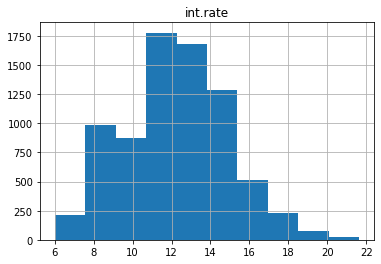

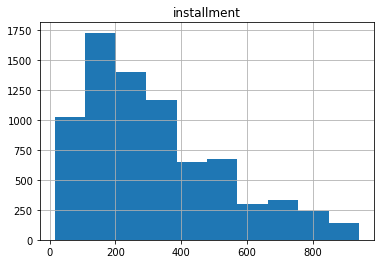

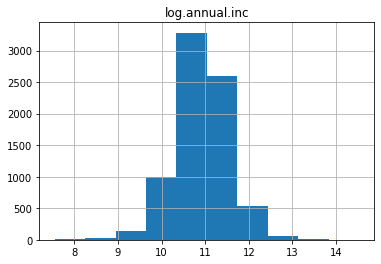

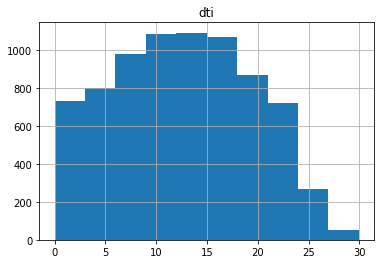

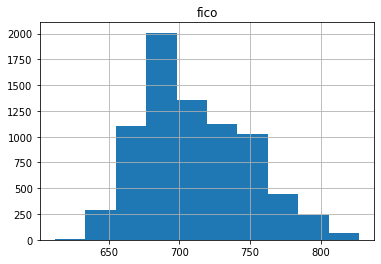

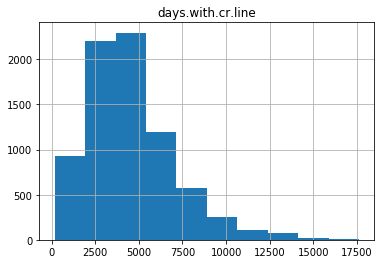

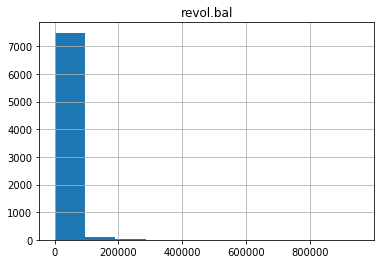

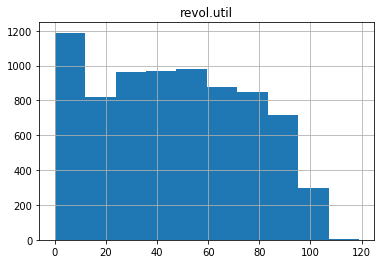

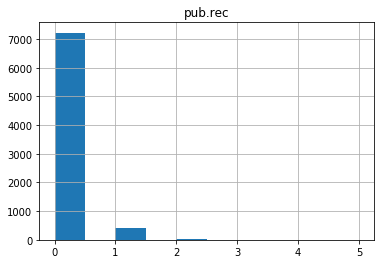

In [160]:
# Check the distribution of certain columns you might find of interest. 
# This can be done by calling the plot_distribution(). 
for column in num_cols:
    train_data[column].hist()
    plt.title(column)
    plt.show()

In [161]:
def power_trans(df,col,power):
    lst=[]
    for i in df[col]:
        if i<0:
            lst.append(-np.power(abs(i),power))
        else:
            lst.append(np.power(i,power))
    return pd.DataFrame(lst)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B6A0424288>]],
      dtype=object)

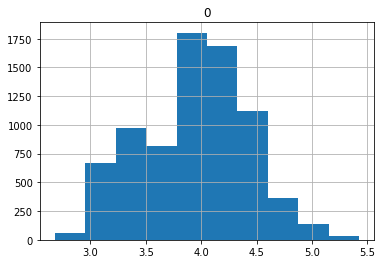

In [162]:
power_trans(train_data,'int.rate',0.55).hist()

In [163]:
train_data['int.rate']= power_trans(train_data,'int.rate',0.55)
train_data['installment']= power_trans(train_data,'installment',0.43)
train_data['log.annual.inc']= power_trans(train_data,'log.annual.inc',0.8)
train_data['fico']= power_trans(train_data,'fico',0.01)
train_data['days.with.cr.line']= power_trans(train_data,'days.with.cr.line',0.35)
train_data['revol.bal']= power_trans(train_data,'revol.bal',0.15)
train_data['revol.util']= power_trans(train_data,'revol.util',0.8)

### Convert categorical Columns into numerical 

In [164]:
print("Categorical Columns-",cat_cols)

Categorical Columns- ['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs', 'paid.back.loan']


In [165]:
train_data= pd.concat([pd.get_dummies(train_data['credit.policy']),train_data], axis=1)
train_data= pd.concat([pd.get_dummies(train_data['purpose']),train_data], axis=1)
train_data= pd.concat([pd.get_dummies(train_data['inq.last.6mths']),train_data], axis=1)
train_data= pd.concat([pd.get_dummies(train_data['delinq.2yrs']),train_data], axis=1)

In [166]:
train_data.drop(['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs'], axis=1, inplace=True)

In [167]:
print(train_data.shape)
train_data.head()

(7662, 25)


No  Yes  Less than 10  Less than 20  Less than 40  Less than 5  all_other  \
0   1    0             0             0             0            1          0   
1   0    1             0             0             0            1          0   
2   1    0             0             0             0            1          0   
3   1    0             1             0             0            0          1   
4   0    1             0             0             0            1          0   

   credit_card  debt_consolidation  educational  home_improvement  \
0            0                   1            0                 0   
1            1                   0            0                 0   
2            0                   1            0                 0   
3            0                   0            0                 0   
4            0                   1            0                 0   

   major_purchase  small_business  No  Yes  int.rate  installment  \
0               0               0   0    1  4.016734    16.616722   
1               0               0   0    1  3.586989    14.289946   
2               0               0   0    1  4.076319     7.865406   
3               0               0   1    0  4.494389    12.391707   
4               0               0   0    1  4.370767    12.334804   

   log.annual.inc    dti      fico  days.with.cr.line  revol.bal  revol.util  \
0        7.062731  14.45  1.068035          18.680800   4.148994   23.521435   
1        6.468380  12.87  1.068470          20.746097   4.224640   15.719382   
2        6.927311   1.58  1.067582          17.203417   4.098321   35.121487   
3        6.879720  11.01  1.067504          20.206496   4.017780   17.306919   
4        6.465046  11.36  1.067269          15.309450   4.012830   25.392174   

   pub.rec paid.back.loan  
0        0            Yes  
1        0            Yes  
2        0            Yes  
3        0            Yes  
4        0            Yes

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [168]:
# Split the train data into train and validation set
X= train_data.drop('paid.back.loan',1)
y= train_data['paid.back.loan']

highest_acc_scr= 0
chosen_state= 0

for n in range(10):
    random_state=n
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=random_state,test_size=0.3)
    
    #Standardize the data
    Scaler= StandardScaler()
    X_train= Scaler.fit_transform(X_train)
    X_test= Scaler.transform(X_test)
    
    #Initialize the Decision Tree Model
    model= tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
    
    # Initialize the Random Forest Classifier 
    #model= RandomForestClassifier(max_depth = 15, random_state = 0, criterion = 'entropy')
    
    
    #Polynomial Features
    poly= PolynomialFeatures()
    X_train=poly.fit_transform(X_train)
    X_test=poly.transform(X_test)
    
    #Predict the accuracy score
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    acc_scr= accuracy_score(y_test,pred)  
    if acc_scr>highest_acc_scr:
        highest_acc_scr=acc_scr
        chosen_state=n
print("The highest acc_score using Ridge Model is {} with chosen random state {}".format(highest_acc_scr,chosen_state))

#Code Ends here

The highest acc_score using Ridge Model is 0.8503697259678121 with chosen random state 4


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [180]:
# Code Starts here
test= pd.read_csv(r"C:\Users\vaibh\Desktop\Python DS\Sprint 8_Tree Based ML Algorithm\Loan Defaulters\test.csv")
Id=test['Id'].copy()
test.head()

Id customer.id credit.policy             purpose int.rate  installment  \
0  5468    LA005469           Yes  debt_consolidation   11.83%       497.01   
1  7530    LA007531           Yes           all_other   14.96%       138.59   
2   501     LA00502           Yes           all_other    9.76%        80.39   
3  2690    LA002691           Yes  debt_consolidation   16.32%       247.20   
4  3691    LA003692           Yes         credit_card    8.00%       188.02   

   log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0       11.385092  19.70   732        6481.958333      32725        41.9   
1       10.714418   1.79   682        1230.041667       1298        81.1   
2        9.998798  22.25   737        2404.041667       2574        10.5   
3       10.915088   3.99   662        2189.958333       4747        93.1   
4       11.446786  13.27   752        2250.000000       7501        26.8   

   pub.rec inq.last.6mths delinq.2yrs  
0        0    Less than 5          No  
1        0    Less than 5          No  
2        0    Less than 5          No  
3        0    Less than 5         Yes  
4        0    Less than 5          No

In [181]:
test.drop(['Id','customer.id'], axis=1, inplace=True)

In [182]:
print(test.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
pub.rec              0
inq.last.6mths       0
delinq.2yrs          0
dtype: int64


In [183]:
# We have int.rate column with compensations stored in form of strings. We need to clean it and convert this to numeric. 
# Call the clean_sign() to do the same. 
test['int.rate']= clean_sign(test,'int.rate')

In [184]:
# Apply some good transformation. The same applied for train_data
test['int.rate']= power_trans(test,'int.rate',0.55)
test['installment']= power_trans(test,'installment',0.43)
test['log.annual.inc']= power_trans(test,'log.annual.inc',0.8)
test['fico']= power_trans(test,'fico',0.01)
test['days.with.cr.line']= power_trans(test,'days.with.cr.line',0.35)
test['revol.bal']= power_trans(test,'revol.bal',0.15)
test['revol.util']= power_trans(test,'revol.util',0.8)

In [185]:
# Convert all categorical columns to numerical columns
test= pd.concat([pd.get_dummies(test['credit.policy']),test], axis=1)
test= pd.concat([pd.get_dummies(test['purpose']),test], axis=1)
test= pd.concat([pd.get_dummies(test['inq.last.6mths']),test], axis=1)
test= pd.concat([pd.get_dummies(test['delinq.2yrs']),test], axis=1)

In [186]:
test.drop(['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs'], axis=1, inplace=True)

In [187]:
print(test.shape)
test.head()

(1916, 23)


No  Yes  Less than 10  Less than 20  Less than 5  all_other  credit_card  \
0   1    0             0             0            1          0            0   
1   1    0             0             0            1          1            0   
2   1    0             0             0            1          1            0   
3   0    1             0             0            1          0            0   
4   1    0             0             0            1          0            1   

   debt_consolidation  educational  home_improvement  major_purchase  \
0                   1            0                 0               0   
1                   0            0                 0               0   
2                   0            0                 0               0   
3                   1            0                 0               0   
4                   0            0                 0               0   

   small_business  No  Yes  int.rate  installment  log.annual.inc    dti  \
0               0   0    1  3.891720    14.435672        6.999536  19.70   
1               0   0    1  4.428049     8.335751        6.667682   1.79   
2               0   0    1  3.501043     6.595335        6.308967  22.25   
3               0   0    1  4.645111    10.690816        6.767399   3.99   
4               0   0    1  3.138336     9.504029        7.029863  13.27   

       fico  days.with.cr.line  revol.bal  revol.util  pub.rec  
0  1.068182          21.582273   4.755892   19.850489        0  
1  1.067426          12.063461   2.930834   33.667951        0  
2  1.068254          15.252102   3.247815    6.560719        0  
3  1.067109          14.762250   3.560106   37.597567        0  
4  1.068470          14.902663   3.813009   13.883784        0

In [188]:
test['Less than 40'] = 0
test.shape

(1916, 24)

In [189]:
# Split the train data into train and validation set
X= train_data.drop('paid.back.loan',1)
y= train_data['paid.back.loan']

random_state=4
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=random_state,test_size=0.3)
    
#Standardize the data
Scaler= StandardScaler()
X_train= Scaler.fit_transform(X_train)
test=Scaler.transform(test)
    
#Initialize the Decision Tree Model
model= tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
    
#Polynomial Features
poly= PolynomialFeatures()
X_train=poly.fit_transform(X_train)
test=poly.transform(test)

#Predict the accuracy score
model.fit(X_train,y_train)
pred=model.predict(test)

In [190]:
submission= pd.DataFrame({'Id':Id,'paid.back.loan':pred})
submission.to_csv("Second_Submission_DecisionTree.csv", index=False)